# Lloyd's Algorithm

K-means clustering is a technique used in unsupervised learning to classify data into *k* different groups. The most famous algorithm used for k-means clustering is called Lloyd's algorithm, which is often confused as **the k-mean algorithm**.

Lloyd's algorithm is actually fairly straightforward. It consists of 4 steps:
1. Initialize *k* arbitrary starting points (μ1 ... μk), where k is the number of groups.
2. Classify closest points to μk as the its group.
3. For each group k, re-calculate a new μk.
4. Repeat step 2 & 3 until μk converges.

Basically, we want to find the best center points for each group. Using those center points, the data closest to them will be grouped as its group.

In [1]:
# Import some useful libraries before we begin
import numpy as np
import pylab as plt

As always, we can't do any machine learning task without data. Let's first generate some data that is suitable for this exercise.

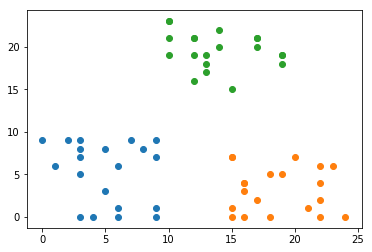

In [2]:
# Group 1
x1 = np.random.randint(0, 10, 20)
y1 = np.random.randint(0, 10, 20)

# Group 2
x2 = np.random.randint(15, 25, 20)
y2 = np.random.randint(0, 10, 20)

# Group 3
x3 = np.random.randint(10, 20, 20)
y3 = np.random.randint(15, 25, 20)

data_range = [(0, 25), (0, 25)]

# plot the data out
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.show()

Note that in the example above, each sample is labelled. However, when doing unsupervised learning, we often don't have labelled data (if we do, it would be meaningless to do unsupervised learning...). Since the data will be unlabelled, the plot would look more like below.

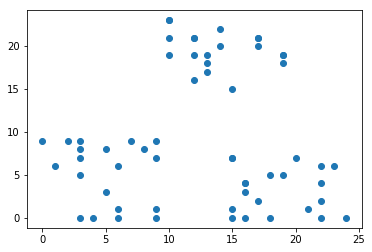

In [3]:
all_x = np.concatenate((x1, x2, x3))
all_y = np.concatenate((y1, y2, y3))
all_data = list(zip(all_x, all_y))

plt.scatter(all_x, all_y)
plt.show()

We will cheat here by setting k = 3 for demonstration purposes. In practice, we often don't know what k is and must tune and try to get the best result. Therefore, k is a *hyperparameter*.

## Step 1: Initialize μ's

In [4]:
# k = number of points
# bound = the range for each dimension; dtype = list of tuples containing min and max
def initialize_mu(k, bounds):
    mus = [] # a list of mus we will generate
    
    for i in range(k):
        mu = tuple(np.random.randint(mi, ma) for mi, ma in bounds)
        while mu in mus:
            mu = tuple(np.random.randint(mi, ma) for mi, ma in bounds)
        mus.append(mu)
    
    return mus

k = 3
mus = initialize_mu(k, data_range)

Let's plot out the points so we can see better visually.

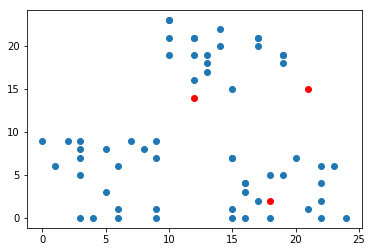

In [5]:
mus_x = [point[0] for point in mus]
mus_y = [point[1] for point in mus]

plt.scatter(all_x, all_y)
plt.scatter(mus_x, mus_y, color='red')
plt.show()

Now that we have initialized our starting μ's and a set of data, we can start implementing Lloyd's algorithm. We will use squared distance as our distance function to make things easier.

In [6]:
print("Initial mu's:\n", mus)
print()
print("All our data points:\n", all_data)

# Our distance function
def squared_distance(point1, point2):
    diff = np.asarray(point1) - np.asarray(point2)
    return diff.dot(diff)

Initial mu's:
 [(18, 2), (21, 15), (12, 14)]

All our data points:
 [(3, 9), (4, 0), (9, 7), (6, 1), (1, 6), (6, 0), (9, 0), (9, 1), (6, 6), (3, 8), (3, 7), (8, 8), (5, 8), (3, 5), (0, 9), (5, 3), (7, 9), (3, 0), (2, 9), (9, 9), (17, 2), (24, 0), (19, 5), (15, 7), (21, 1), (16, 3), (20, 7), (22, 2), (23, 6), (18, 0), (15, 7), (16, 4), (16, 0), (18, 5), (22, 0), (22, 6), (22, 4), (15, 0), (15, 1), (16, 4), (14, 22), (17, 21), (17, 21), (12, 21), (17, 20), (12, 21), (19, 19), (19, 19), (13, 17), (10, 21), (10, 23), (10, 19), (15, 15), (13, 18), (19, 18), (13, 19), (12, 16), (12, 19), (14, 20), (10, 23)]


## Step 2: Use μ's to group data.
In this step, we will use the current μ's that we have to group data according to our distance function.

In [7]:
def group_data(mus, data, k, distance_function, display_groups=False):
    groups = [[] for i in range(k)] # we have k groups
    for data in all_data:
        group_num = sorted([(distance_function(mus[i], data), i) for i in range(k)])[0][1]
        groups[group_num].append(data)
    
    # display all groups
    if display_groups:
        for i in range(k):
            print("Group", i, ":\n", groups[i])
            print()
            
    return groups

## Step 3: Re-calculate μ's.
After grouping the data, we calculate new μ's simply by averaging the values in each dimension for each group.

In [8]:
def update_mus(mus, groups, k):
    counter = 0
    not_converged = False
    for g in groups:
        if g:
            new_mu = tuple(sum(x) / len(x) for x in zip(*g))
            if mus[counter] != new_mu:
                not_converged = True
                mus[counter] = new_mu
        counter += 1
    
    return not_converged

Let's run one iteration to see the changes of μ's.

Group 0 :
 [(4, 0), (6, 1), (6, 0), (9, 0), (9, 1), (5, 3), (3, 0), (17, 2), (24, 0), (19, 5), (15, 7), (21, 1), (16, 3), (20, 7), (22, 2), (23, 6), (18, 0), (15, 7), (16, 4), (16, 0), (18, 5), (22, 0), (22, 6), (22, 4), (15, 0), (15, 1), (16, 4)]

Group 1 :
 [(17, 21), (17, 21), (17, 20), (19, 19), (19, 19), (19, 18)]

Group 2 :
 [(3, 9), (9, 7), (1, 6), (6, 6), (3, 8), (3, 7), (8, 8), (5, 8), (3, 5), (0, 9), (7, 9), (2, 9), (9, 9), (14, 22), (12, 21), (12, 21), (13, 17), (10, 21), (10, 23), (10, 19), (15, 15), (13, 18), (13, 19), (12, 16), (12, 19), (14, 20), (10, 23)]

Converged? False


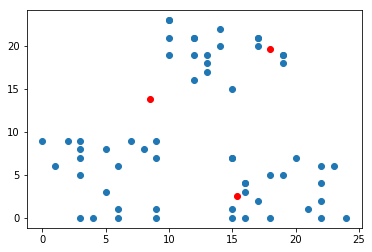

In [9]:
groups = group_data(mus, all_data, k, squared_distance, display_groups=True)
not_converged = update_mus(mus, groups, k)
print("Converged?", not not_converged)

del mus_x[:]
del mus_y[:]
mus_x = [point[0] for point in mus]
mus_y = [point[1] for point in mus]

plt.scatter(all_x, all_y)
plt.scatter(mus_x, mus_y, color='red')
plt.show()

## Step 4: Repeat until convergence.
Great! Now that we have our working code for step 2 and 3, we can finish up step 4, which is nothing but repeating step 2 & 3 until convergence.

In [10]:
while not_converged:
    groups = group_data(mus, all_data, k, squared_distance)
    not_converged = update_mus(mus, groups, k)

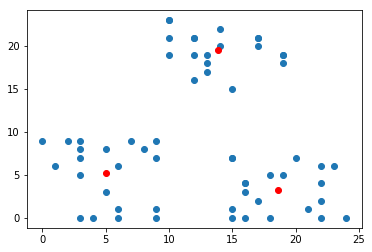

In [11]:
del mus_x[:]
del mus_y[:]
mus_x = [point[0] for point in mus]
mus_y = [point[1] for point in mus]

plt.scatter(all_x, all_y)
plt.scatter(mus_x, mus_y, color='red')
plt.show()

Seems like the center points have converged. Let us plot out the groups and see the final result.

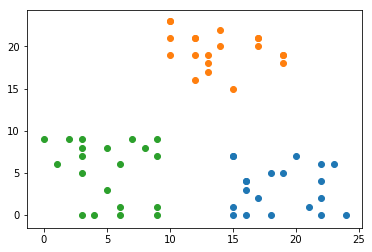

In [12]:
my_groups = group_data(mus, all_data, k, squared_distance)
for g in my_groups:
    g_x = [point[0] for point in g]
    g_y = [point[1] for point in g]
    plt.scatter(g_x, g_y)
plt.show()

Let's combine all steps into one function.

In [13]:
def Lloyd_algorithm(k, data, data_range, initialize_function, distance_function):
    mus = initialize_function(k, data_range)
    
    not_converged = True
    while not_converged:
        groups = group_data(mus, all_data, k, distance_function)
        not_converged = update_mus(mus, groups, k)
        
    return mus

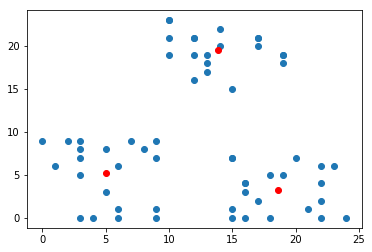

In [14]:
mus = Lloyd_algorithm(k, all_data, data_range, initialize_mu, squared_distance)
del mus_x[:]
del mus_y[:]
mus_x = [point[0] for point in mus]
mus_y = [point[1] for point in mus]

plt.scatter(all_x, all_y)
plt.scatter(mus_x, mus_y, color='red')
plt.show()

Note that even though the algorithm is guaranteed to converged, the result might not be desired. The result of Lloyd's algorithm is affected by the initial μ values. Given a set of μ values, the result is deterministic. Therefore, sometimes it is crucial to pick the appropreicate μ's as starting point. See an example below.

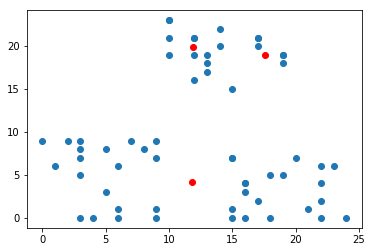

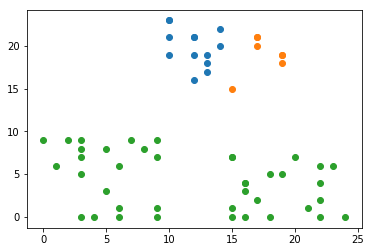

In [15]:
def fixed_mu(k, all_data):
    return [(12, 20), (17, 20), (13, 5)]

mus = Lloyd_algorithm(k, all_data, data_range, fixed_mu, squared_distance)

# first plot
del mus_x[:]
del mus_y[:]
mus_x = [point[0] for point in mus]
mus_y = [point[1] for point in mus]

plt.scatter(all_x, all_y)
plt.scatter(mus_x, mus_y, color='red')
plt.show()

# second plot
my_groups = group_data(mus, all_data, k, squared_distance)
for g in my_groups:
    g_x = [point[0] for point in g]
    g_y = [point[1] for point in g]
    plt.scatter(g_x, g_y)
plt.show()

In conclusion, Lloyd's algorithm is straightforward and easy to implement. Most of the times, it works very well with appropriate k. Arbitrary starting μ values might cause the algorithm to return an undesirable grouping. However, this can be avoided by picking the μ's in a smart way.